In [1]:
# Goal: Test the Autoencoder on the MNIST Dataset, investigate influence of different ativation functions on predictions, use combinations
# relu-relu, relu-sigmoid, sigmoid-relu and sigmoid-sigmoid

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras import layers

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Normalise data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(X_train.shape)
print(X_test.shape)
print("60000 train pictures, each has 784 values stored in a simple array")

2022-12-04 13:57:49.124769: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-04 13:57:49.124815: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-04 13:57:49.168190: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-04 13:57:50.158649: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-04 13:57:50.158771: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

(60000, 784)
(10000, 784)
60000 train pictures, each has 784 values stored in a simple array


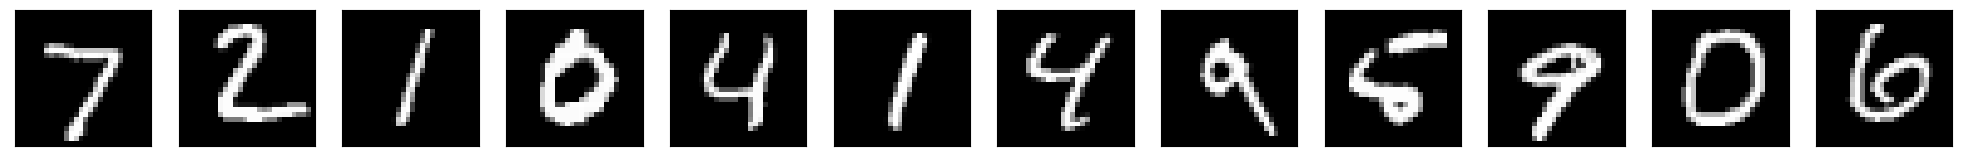

In [2]:
# Plot input data
number_digits = 12 # Plot first 12 digits
plt.figure(figsize=(25, 4))
for i in range(number_digits):
    # Display original
    ax = plt.subplot(2, number_digits, i + 1)
    plt.imshow(X_test[i].reshape(28, 28)) # Reshape necessary because raw data is an array of size 784
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [3]:
# Prepare decoder and encoder, use 'relu', 'sigmoid' or a mixture of them as activation functions.

digits_size = X_train.shape[1] #Number of values for a digit
input_encoder = keras.Input(shape = (digits_size)) # Prepare Digit for input to NN

encoder_relu = layers.Dense(digits_size, activation = 'relu')(input_encoder) # Set up encoder NN, input = digits
encoder_sigmoid = layers.Dense(digits_size, activation = 'sigmoid')(input_encoder)

decoder_relu_relu = layers.Dense(digits_size, activation = 'relu')(encoder_relu)
decoder_relu_sigmoid = layers.Dense(digits_size, activation = 'sigmoid')(encoder_relu)
decoder_sigmoid_relu = layers.Dense(digits_size, activation = 'relu')(encoder_sigmoid)
decoder_sigmoid_sigmoid = layers.Dense(digits_size, activation = 'sigmoid')(encoder_sigmoid)

#Perform reconstructions
autoencoder_relu_relu = keras.Model(input_encoder, decoder_relu_relu)
autoencoder_relu_sigmoid = keras.Model(input_encoder, decoder_relu_sigmoid)
autoencoder_sigmoid_relu = keras.Model(input_encoder, decoder_sigmoid_relu)
autoencoder_sigmoid_sigmoid = keras.Model(input_encoder, decoder_sigmoid_sigmoid)

#Print information about autoencoders
autoencoder_relu_relu.summary()
autoencoder_relu_sigmoid.summary()
autoencoder_sigmoid_relu.summary()
autoencoder_sigmoid_sigmoid.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_2 (Dense)             (None, 784)               615440    
                                                                 
Total params: 1,230,880
Trainable params: 1,230,880
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None

2022-12-04 13:57:53.418991: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-04 13:57:53.419033: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-04 13:57:53.419069: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (26920c06eb75): /proc/driver/nvidia/version does not exist


In [ ]:
# Compile autoencoders
autoencoder_relu_relu.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_relu_sigmoid.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_sigmoid_relu.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_sigmoid_sigmoid.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoders
autoencoder_relu_relu.fit(X_train, X_train, epochs = 10, batch_size = 64, shuffle=True, validation_data = (X_test, X_test))
autoencoder_relu_sigmoid.fit(X_train, X_train, epochs = 10, batch_size = 64, shuffle=True, validation_data = (X_test, X_test))
autoencoder_sigmoid_relu.fit(X_train, X_train, epochs = 10, batch_size = 64, shuffle=True, validation_data = (X_test, X_test))
autoencoder_sigmoid_sigmoid.fit(X_train, X_train, epochs = 10, batch_size = 64, shuffle=True, validation_data = (X_test, X_test))

Epoch 1/10
938/938 [==============================] - 12s 12ms/step - loss: 0.6315 - val_loss: 1.1206
Epoch 2/10
938/938 [==============================] - 11s 12ms/step - loss: 1.0697 - val_loss: 1.2907
Epoch 3/10
938/938 [==============================] - 13s 14ms/step - loss: 1.3335 - val_loss: 1.3233
Epoch 4/10
938/938 [==============================] - 13s 14ms/step - loss: 1.4539 - val_loss: 1.5141
Epoch 5/10
938/938 [==============================] - 13s 14ms/step - loss: 1.5719 - val_loss: 1.6318
Epoch 6/10
938/938 [==============================] - 14s 15ms/step - loss: 1.5981 - val_loss: 1.6568
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 1.6723 - val_loss: 1.7463
Epoch 8/10
938/938 [==============================] - 13s 14ms/step - loss: 1.7097 - val_loss: 1.7265
Epoch 9/10
938/938 [==============================] - 14s 14ms/step - loss: 1.7227 - val_loss: 1.7702
Epoch 10/10
938/938 [==============================] - 18s 20ms/step - loss: 1.754

In [ ]:
# Set up validation
output_layer_relu_relu = autoencoder_relu_relu.layers[-1]
output_layer_relu_sigmoid = autoencoder_relu_sigmoid.layers[-1]
output_layer_sigmoid_relu = autoencoder_sigmoid_relu.layers[-1]
output_layer_sigmoid_sigmoid = autoencoder_sigmoid_sigmoid.layers[-1]

encoder_validate_relu = keras.Model(input_encoder, encoder_relu)
encoder_validate_sigmoid = keras.Model(input_encoder, encoder_sigmoid)

encoded_input = keras.Input(shape = (digits_size))

decoder_validate_relu_relu = keras.Model(encoded_input, output_layer_relu_relu(encoded_input))
decoder_validate_relu_sigmoid = keras.Model(encoded_input, output_layer_relu_sigmoid(encoded_input))
decoder_validate_sigmoid_relu = keras.Model(encoded_input, output_layer_sigmoid_relu(encoded_input))
decoder_validate_sigmoid_sigmoid = keras.Model(encoded_input, output_layer_sigmoid_sigmoid(encoded_input))

# Perform predictions
encoded_imgs_relu = encoder_validate_relu.predict(X_test)
encoded_imgs_sigmoid = encoder_validate_sigmoid.predict(X_test)

decoded_imgs_relu_relu = decoder_validate_relu_relu.predict(encoded_imgs_relu)
decoded_imgs_relu_sigmoid = decoder_validate_relu_sigmoid.predict(encoded_imgs_relu)
decoded_imgs_sigmoid_relu = decoder_validate_sigmoid_relu.predict(encoded_imgs_sigmoid)
decoded_imgs_sigmoid_sigmoid = decoder_validate_sigmoid_sigmoid.predict(encoded_imgs_sigmoid)

In [ ]:
# Plot relu relu results
plt.figure(figsize=(25, 4))
for i in range(number_digits):
    # Plot original
    ax = plt.subplot(2, number_digits, i + 1)
    plt.imshow(X_test[i].reshape(28, 28)) # Reshape necessary because raw data is an array of size 784
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Plot reconstruction
    ax = plt.subplot(2, number_digits, i + 1 + number_digits)
    plt.imshow(decoded_imgs_relu_relu[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Plot relu sigmoid results
plt.figure(figsize=(25, 4))
for i in range(number_digits):
    # Plot original
    ax = plt.subplot(2, number_digits, i + 1)
    plt.imshow(X_test[i].reshape(28, 28)) # Reshape necessary because raw data is an array of size 784
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Plot reconstruction
    ax = plt.subplot(2, number_digits, i + 1 + number_digits)
    plt.imshow(decoded_imgs_relu_sigmoid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Plot sigmoid relu results
plt.figure(figsize=(25, 4))
for i in range(number_digits):
    # Plot original
    ax = plt.subplot(2, number_digits, i + 1)
    plt.imshow(X_test[i].reshape(28, 28)) # Reshape necessary because raw data is an array of size 784
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Plot reconstruction
    ax = plt.subplot(2, number_digits, i + 1 + number_digits)
    plt.imshow(decoded_imgs_sigmoid_relu[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Plot sigmoid sigmoid results
plt.figure(figsize=(25, 4))
for i in range(number_digits):
    # Plot original
    ax = plt.subplot(2, number_digits, i + 1)
    plt.imshow(X_test[i].reshape(28, 28)) # Reshape necessary because raw data is an array of size 784
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Plot reconstruction
    ax = plt.subplot(2, number_digits, i + 1 + number_digits)
    plt.imshow(decoded_imgs_sigmoid_sigmoid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()